<a href="https://colab.research.google.com/github/shonyeajin/KCBD/blob/main/%EC%BB%A8%EB%B8%8C%EB%84%B7_CAT_AND_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeajinshon","key":"5d9263b1f17cbceaaf414658d4f7f975"}'}

In [15]:
ls -1ha kaggle.json

kaggle.json


In [18]:
from IPython.core.display import JSON
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.2MB/s]
 97% 529M/543M [00:03<00:00, 171MB/s]
100% 543M/543M [00:03<00:00, 174MB/s]
100% 270M/271M [00:01<00:00, 193MB/s]
100% 271M/271M [00:01<00:00, 161MB/s]


In [ ]:
!unzip train.zip

In [24]:
!ls

drive	     sample_data	   test1.zip  train.zip
kaggle.json  sampleSubmission.csv  train


In [ ]:
import os, shutil

original_dataset_dir='./datasets/cats_and_dogs/train'

base_dir='./datasets/cats_and_dogs_small'
#os.mkdir(base_dir)

In [29]:
train_dir=os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir=os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [31]:
train_cats_dir=os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)


In [32]:
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [33]:
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [34]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copyfile(src, dst)

In [35]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src, dst)

In [36]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copyfile(src, dst)

In [37]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [38]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [39]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [40]:
print('훈련용 고양이 이미지 전체 개수:',len(os.listdir(train_cats_dir))) #copy complete test

훈련용 고양이 이미지 전체 개수: 1000


컨브넷 만들기

In [41]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


데이터 전처리

In [54]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [55]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:',labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


밑에 보면 미니배치가 아니라 걍 배치네

In [56]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 27s 172ms/step - loss: 0.6864 - acc: 0.5445 - val_loss: 0.6743 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 13s 127ms/step - loss: 0.6586 - acc: 0.6060 - val_loss: 0.6730 - val_acc: 0.5770
Epoch 3/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6224 - acc: 0.6630 - val_loss: 0.6206 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 13s 126ms/step - loss: 0.5819 - acc: 0.7010 - val_loss: 0.6124 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5479 - acc: 0.7320 - val_loss: 0.5821 - val_acc: 0.7010
Epoch 6/30
100/100 [==============================] - 14s 143ms/step - loss: 0.5132 - acc: 0.7460 - val_loss: 0.6181 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 14s 145ms/step - loss: 0.4993 - acc: 0.7540 - val_loss: 0.5840 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 1

In [57]:
model.save('cats_and_dogs_small_1.h5')

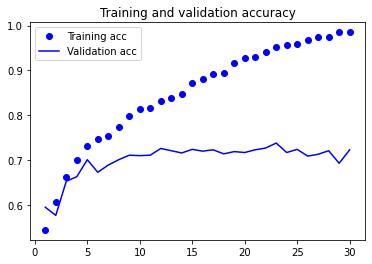

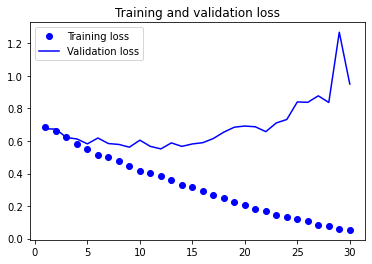

In [59]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc ,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss ,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()